In [7]:
##"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [9]:
from google.colab import widgets
import time

In [10]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 170
        self.reward= 0

    def reset(self):
        self.timestep = 0        
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.wall1 = [0,1]
        self.wall2 = [0,3]
        self.wall3 = [2,2]
        self.wall4 = [3,0]
        pos= self.agent_pos[0]*4+self.agent_pos[1]
        self.state = np.zeros([4,4])
        
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.state[tuple(self.wall4)] = 5
        self.state[tuple(self.agent_pos)] = 1
        self.reward=1
        observation = self.state.flatten()
        return pos
    
    def step(self, action):
        if action == 0:
          self.agent_pos[0] += 1
          if self.agent_pos[0] == 4:
            self.agent_pos[0] -= 1
        if action == 1:
          self.agent_pos[0] -= 1
          if self.agent_pos[0] == -1:
            self.agent_pos[0] += 1
        if action == 2:
          self.agent_pos[1] += 1
          if self.agent_pos[1] == 4:
            self.agent_pos[1] -= 1
        if action == 3:
          self.agent_pos[1] -= 1
          if self.agent_pos[1] == -1:
            self.agent_pos[1] += 1


        state_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        new_pos = state_table[tuple(self.agent_pos)]
        self.agent_pos = np.clip(self.agent_pos, 0, 3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 3
        
        reward_table= np.array([[-1,-20,-1,-20],[-1,-1,-1,-1],[-1,-1,-20,-1],[-20,-1,-1,100]])
        reward= reward_table[tuple(self.agent_pos)]
        self.timestep += 1
        done = True if new_pos == 15 else False #check if terminal or not 
        info = {}
        return new_pos, reward, done, info
        
    def render(self):
        
        self.state[tuple(self.goal_pos)] = 3
        self.state[tuple(self.wall1)] = 5
        self.state[tuple(self.wall2)] = 5
        self.state[tuple(self.wall3)] = 5
        self.state[tuple(self.wall4)] = 5

        self.state[tuple(self.agent_pos)] = 1
        plt.imshow(self.state)

""


Q Table:
 [[ 54.9539      48.32412394  35.87565187  48.30862711]
 [ 62.17063111  27.0436108   51.26444     36.61430387]
 [ 70.14065252  39.11936256  37.07343295  18.47089118]
 [ 79.02520673  25.62265236  35.73808101  45.10632823]
 [ 60.36672831  48.27682823  62.171       54.83526851]
 [ 69.77281721  35.79736092  70.19        54.85531645]
 [ 59.98541864  61.77697843  79.1         62.04047588]
 [ 89.          50.64118626  79.01283895  70.10890276]
 [ 33.74381634  29.19446372  69.80765873  42.08249367]
 [ 79.09098959  53.14485385  44.77121303  44.97539487]
 [ 86.9359985   61.31522317  88.99810618  53.99430996]
 [100.          79.01613154  88.91170335  59.92182686]
 [ 16.94045496  32.05557976  76.89582559  21.73466008]
 [ 75.89930675  61.11394336  88.99836452  41.08365052]
 [ 82.75847499  51.72188307  99.99980932  76.44187921]
 [  0.           0.           0.           0.        ]]
Episodes 1000
Steps per episode 10.092
TRAINING done!



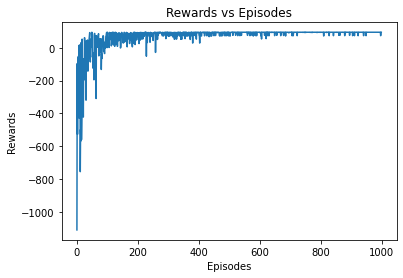

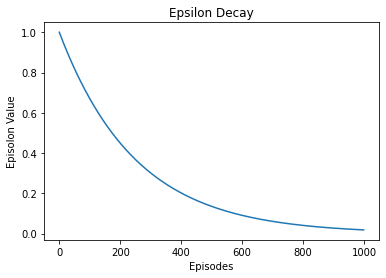

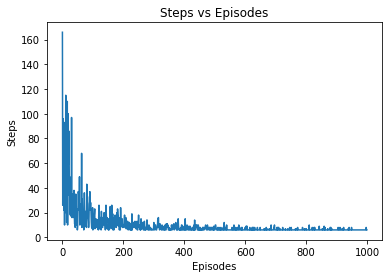

<Figure size 432x288 with 0 Axes>

In [11]:
from matplotlib import figure
env = GridEnvironment()
# Q_Table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
output_grid = widgets.Grid(1, 1)
alpha = 0.1
gamma = 0.9
epsilon = 1


total_epochs=0
episodes=1000
total_timestep = []
total_reward = []
total_epsilon = []
total_steps = []
all_epochs = 0


for i in range(episodes):
    state = env.reset()
    r=0
    epochs, reward, steps = 0, 0, 0
    done = False
    
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explorative
            steps += 1
        else:
            action = np.argmax(q_table[state]) # Exploitative 
            steps += 1

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        
        state = next_state
        epochs += 1
        r+=reward
             
    total_timestep.append(epochs)
    total_reward.append(r) 
    total_epochs += epochs
    epsilon= np.exp(-4*i/episodes)
    total_epsilon.append(epsilon)  
    total_steps.append(steps)



###       ADD PLOTS HERE
plt.plot(total_reward) 
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.figure()
plt.plot(total_epsilon)
plt.title('Epsilon Decay')
plt.xlabel('Episodes')
plt.ylabel('Episolon Value')
plt.figure()         


print("Q Table:\n", q_table)
print('Episodes', episodes)
print("Steps per episode", np.sum(total_steps)/episodes)


plt.plot(total_steps)
plt.title("Steps vs Episodes")
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.figure()


print('TRAINING done!\n')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Episode: 10


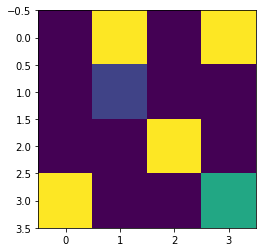

<IPython.core.display.Javascript object>

In [ ]:
episodes = 10
total_reward=[]
total_episode =[]
total_epsilon = []


for eps in range(episodes):
    r = 0
    state = env.reset()
    epochs, reward = 0, 0   
    done = False    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        r += reward    
        epochs += 1
        if eps > 8 :
          with output_grid.output_to(0, 0):
            output_grid.clear_cell()
            print(f"Episode:", eps+1)
            env.render()  
          time.sleep(2)
    total_reward.append(r) 
    total_episode.append(epochs) 

plt.plot(total_reward)
plt.title('Rewards vs Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards') 
plt.figure()      

print("TEST Done!\n")